In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)
    def PlotSequence(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.scatter(self.x,self.y)

# Thomas Calculus
## Chapter 10 Infinite Sequences and Series
### 10.1 Sequences
#### Finding Terms of a Sequence
#### Finding a Sequence’s Formula
#### Convergence and Divergence
#### Recursively Defined Sequences
#### Theory and Examples
#### COMPUTER EXPLORATIONS
Use a CAS to perform the following steps for the sequences in Exercises 147–158.  
a. Calculate and then plot the first 25 terms of the sequence. Does the sequence appear to be bounded from above or below? Does it appear to converge or diverge? If it does converge, what is the limit $L$?  
b. If the sequence converges, find an integer $N$ such that $|a_n - L| \le 0.01$ for $n \ge N$. How far in the sequence do you have to get for the terms to lie within $0.0001$ of $L$?

147. $a_n = \sqrt[n]{n}$

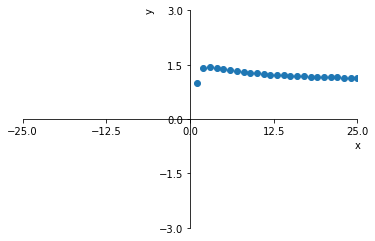

In [7]:
def f(x):
    return x**(1/x)  
FunctionPlotter(f,domain=3,CustomDomain=np.linspace(1,25,25),
    ticks=[np.linspace(-25,25,5),np.linspace(-3,3,5)],
    lim=[(-25,25),(-3,3)]).PlotSequence()

### 10.4 Comparison Tests
#### Direct Comparison Test
#### Limit Comparison Test
#### Determining Convergence or Divergence
#### Theory and Examples
#### COMPUTER EXPLORATIONS
73. It is not yet known whether the series  
    $$
    \sum\limits_{n = 1}^{\infty}\dfrac{1}{n^3\sin^2n}
    $$
    converges or diverges. Use a CAS to explore the behavior of the series by performing the following steps.  
    a. Define the sequence of partial sums 
    $$
    s_k = \sum\limits_{n = 1}^{k}\dfrac{1}{n^3\sin^2n}
    $$
    What happens when you try to ind the limit of $s_k$ as $k \to\infty$? Does your CAS find a closed form answer for this limit?   
    b. Plot the first 100 points $(k, s_k)$ for the sequence of partial sums. Do they appear to converge? What would you estimate the limit to be?  
    c. Next plot the first 200 points $(k, s_k)$. Discuss the behavior in your own words.   
    d. Plot the first 400 points $(k, s_k)$ What happens when $k = 355$? Calculate the number $\dfrac{355}{133}$. Explain from you calculation what happened at $k = 355$. For what values of $k$ would you guess this behavior might occur again?

In [35]:
def f(x):
    ak = np.array([((1/i)**3)*(np.sin(i)**2) for i in range(1,int(x+1))])
    return  np.sum(ak)  

In [31]:
print(f(1000000),f(2000000), f(3000000))

0.8350141876220328 0.8350141876222208 0.8350141876222555


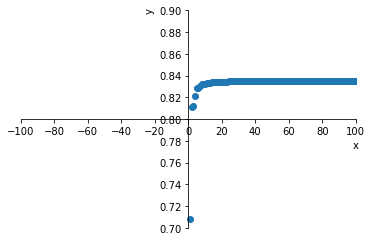

In [47]:
p = FunctionPlotter(f,3,np.linspace(1,100,1),ticks=[np.linspace(-100,100,11),np.linspace(0.7,0.9,11)],lim=[(-100,100),(0.7,0.9)])
p.canvas()
x = np.linspace(1,100,100)
y = [f(i) for i in x]
p.ax.scatter(x,y)

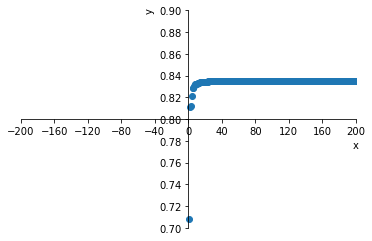

In [42]:
p = FunctionPlotter(f,3,np.linspace(1,100,1),ticks=[np.linspace(-200,200,11),np.linspace(0.7,0.9,11)],lim=[(-200,200),(0.7,0.9)])
p.canvas()
x = np.linspace(1,200,200)
y = [f(i) for i in x]
p.ax.scatter(x,y)

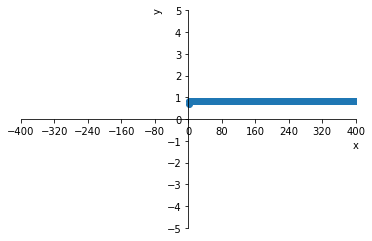

In [48]:
p = FunctionPlotter(f,3,np.linspace(1,100,1),ticks=[np.linspace(-400,400,11),np.linspace(-5,5,11)],lim=[(-400,400),(-5,5)])
p.canvas()
x = np.linspace(1,400,400)
y = [f(i) for i in x]
p.ax.scatter(x,y)


### 10.9 Convergence of Taylor Series
#### Finding Taylor Series
#### Error Estimates  
#### Theory and Examples
#### COMPUTER EXPLORATIONS
Taylor’s formula with $n = 1$ and $a = 0$ gives the linearization of a function at $x = 0.$ With $n = 2$ and $n = 3$ we obtain the standard quadratic and cubic approximations. In these exercises we explore the errors associated with these approximations. We seek answers to two questions:  
a. For what values of $x$ can the function be replaced by each approximation with an error less than $10^{-2}$?   
b. What is the maximum error we could expect if we replace the function by each approximation over the specified interval?  
Using a CAS, perform the following steps to aid in answering questions (a) and (b) for the functions and intervals in Exercises 57–62.   
Step 1: Plot the function over the specified interval.   
Step 2: Find the Taylor polynomials $P_1(x), P_2(x),$ and $P_3(x)$ at $x = 0$.  
Step 3: Calculate the $(n + 1)$st derivative $f^{(n+1)}(c)$ associated with the remainder term for each Taylor polynomial. Plot the derivative as a function of $c$ over the specified interval and estimate its maximum absolute value, $M$.  
Step 4: Calculate the remainder $R_n(x)$ for each polynomial. Using the estimate $M$ from Step 3 in place of $f^{(n+1)}(c)$, plot $R_n(x)$ over the specified interval. Then estimate the values of $x$ that answer question (a).  
Step 5: Compare your estimated error with the actual error $E_n(x) = |f(x) - P_n(x)|$ by plotting $E_n(x)$ over the specified interval. This will help answer question (b).  
Step 6: Graph the function and its three Taylor approximations together. Discuss the graphs in relation to the information discovered in Steps 4 and 5.  
57. $f(x) = \dfrac{1}{\sqrt{1+x}}, |x| < \dfrac{3}{4}$ 

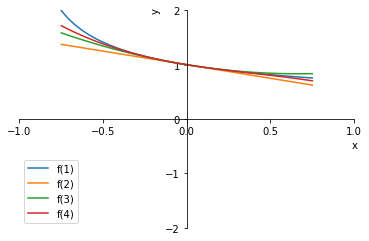

In [5]:
def f1(x):
    return 1/np.sqrt(1+x) 
def f2(x):
    return 1-0.5*x
def f3(x):
    return 1-0.5*x + (3/8)*(x**2) 
def f4(x):
    return 1-0.5*x + (3/8)*(x**2) -(5/16)*(x**3)     
FunctionPlotter([f1,f2,f3,f4],3,np.linspace(-0.75,0.75,100),ticks=[np.linspace(-1,1,5),np.linspace(-2,2,5)],lim=[(-1,1),(-2,2)]).PlotMultiFunction()

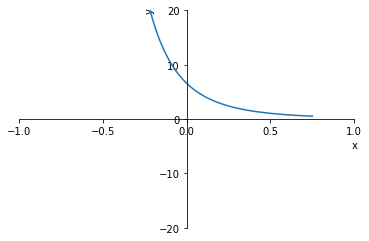

In [8]:
def f5(x):
    return 105/(16*(1+x)**(9/2))
FunctionPlotter(f5,3,np.linspace(-0.75,0.75,100),ticks=[np.linspace(-1,1,5),np.linspace(-20,20,5)],lim=[(-1,1),(-20,20)]).plot()

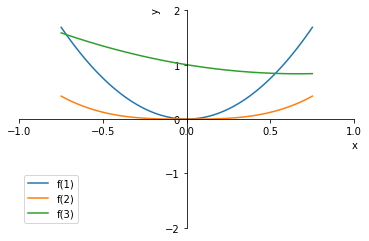

In [13]:
def r1(x):
    return 6*(x**2/2)
def r2(x):
    return 6*(np.abs(x**3)/6)
def r3(x):
    return 6*(np.abs(x**4)/24) 
FunctionPlotter([r1,r2,f3],3,np.linspace(-0.75,0.75,100),ticks=[np.linspace(-1,1,5),np.linspace(-2,2,5)],lim=[(-1,1),(-2,2)]).PlotMultiFunction()   

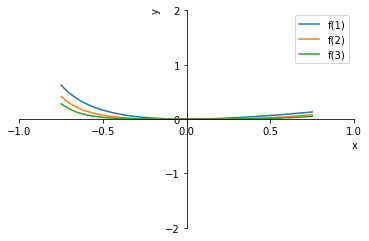

In [11]:
def e1(x):
    return np.abs(f1(x) - f2(x))
def e2(x):
    return np.abs(f1(x) - f3(x))
def e3(x):
    return np.abs(f1(x) - f4(x) )
FunctionPlotter([e1,e2,e3],3,np.linspace(-0.75,0.75,100),ticks=[np.linspace(-1,1,5),np.linspace(-2,2,5)],lim=[(-1,1),(-2,2)]).PlotMultiFunction() 